In [187]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
import datetime as dt
print("numpy %s" % np.__version__)
print("pandas %s" % pd.__version__)
# print("matplotlib %s" % mpl.__version__)
print("missingno %s" % msno.__version__)

numpy 1.19.2
pandas 1.2.2
missingno 0.4.2


In [188]:
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)

In [3]:
!conda env list

# conda environments:
#
base                     /Users/napatseelpipat/opt/anaconda3
dsprac                *  /Users/napatseelpipat/opt/anaconda3/envs/dsprac
myenv                    /Users/napatseelpipat/opt/anaconda3/envs/myenv
py36                     /Users/napatseelpipat/opt/anaconda3/envs/py36



# Matplotlib rcParams

In [190]:
plt.style.reload_library()
plt.style.use(['seaborn-pastel', 'seaborn-notebook'])
plt.rcParams.update({
#     "axes.titlesize" : 20,
    "axes.labelsize" : 17,
    "axes.grid" : True, 
    "grid.color": "lightgray",
#     "lines.linewidth" : 3,
#     "lines.markersize" : 10,
#     "xtick.labelsize" : 14,
#     "ytick.labelsize" : 14,
    "figure.autolayout": True, 
    "figure.facecolor": 'white',
    "axes.facecolor": 'white'
})

# EDA

##### import and determine the overlapped dataset

In [191]:
#import datasets
wt = pd.read_csv('weather_data.csv')
ts = pd.read_csv("time_series_60min_singleindex.csv")

#find the overlapped time by utc_timestamp using merge with inner join
ts_wt = wt.merge(ts, how = 'inner', on = 'utc_timestamp')

In [192]:
ts_wt.head()

,utc_timestamp,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,-6.495,0.0,0.0,0.100,0.0,0.0,-13.029,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,-6.503,0.0,0.0,-0.046,0.0,0.0,-13.350,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,-6.458,0.0,0.0,-0.302,0.0,0.0,-13.594,0.0,0.0,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,-6.253,0.0,0.0,-0.541,0.0,0.0,-13.781,0.0,0.0,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,-5.908,0.0,0.0,-0.794,0.0,0.0,-14.042,0.0,0.0,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [193]:
ts_wt.shape

(43825, 384)

###### select DE columns and filter out the LUs

In [194]:
ts_wt_DE_col = [
    i for i in ts_wt.columns 
    if (i[:2] == 'DE') and 
    (i[3:5] != 'LU') and
    ('forecast' not in i.lower())
]
ts_wt_DE_col.insert(0, 'utc_timestamp')
ts_wt_DE_col.insert(1, 'cet_cest_timestamp')
print('The number of columns in time series table related to Germany is %s'%len(ts_wt_DE_col))
for i in ts_wt_DE_col:
    print(i)

The number of columns in time series table related to Germany is 34
utc_timestamp
cet_cest_timestamp
DE_temperature
DE_radiation_direct_horizontal
DE_radiation_diffuse_horizontal
DE_load_actual_entsoe_transparency
DE_solar_capacity
DE_solar_generation_actual
DE_solar_profile
DE_wind_capacity
DE_wind_generation_actual
DE_wind_profile
DE_wind_offshore_capacity
DE_wind_offshore_generation_actual
DE_wind_offshore_profile
DE_wind_onshore_capacity
DE_wind_onshore_generation_actual
DE_wind_onshore_profile
DE_50hertz_load_actual_entsoe_transparency
DE_50hertz_solar_generation_actual
DE_50hertz_wind_generation_actual
DE_50hertz_wind_offshore_generation_actual
DE_50hertz_wind_onshore_generation_actual
DE_amprion_load_actual_entsoe_transparency
DE_amprion_solar_generation_actual
DE_amprion_wind_onshore_generation_actual
DE_tennet_load_actual_entsoe_transparency
DE_tennet_solar_generation_actual
DE_tennet_wind_generation_actual
DE_tennet_wind_offshore_generation_actual
DE_tennet_wind_onshore_gener

In [195]:
ts_wt_DE = ts_wt[ts_wt_DE_col]
ts_wt_DE.head()

,utc_timestamp,cet_cest_timestamp,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE_load_actual_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,...,DE_amprion_solar_generation_actual,DE_amprion_wind_onshore_generation_actual,DE_tennet_load_actual_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,-0.940,0.0,0.0,NaN,37248.0,NaN,NaN,27913.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,-0.981,0.0,0.0,41151.0,37248.0,NaN,NaN,27913.0,...,NaN,857.0,13841.0,NaN,3866.0,469.0,3398.0,5307.0,NaN,5.0
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,-1.035,0.0,0.0,40135.0,37248.0,NaN,NaN,27913.0,...,NaN,794.0,13267.0,NaN,3974.0,466.0,3508.0,5087.0,NaN,7.0
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,-1.109,0.0,0.0,39106.0,37248.0,NaN,NaN,27913.0,...,NaN,826.0,12702.0,NaN,4194.0,470.0,3724.0,4906.0,NaN,8.0
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,-1.166,0.0,0.0,38765.0,37248.0,NaN,NaN,27913.0,...,NaN,852.0,12452.0,NaN,4446.0,473.0,3973.0,4865.0,NaN,11.0


## Observe the missing values and duplicates

### missing values

<AxesSubplot:>

/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


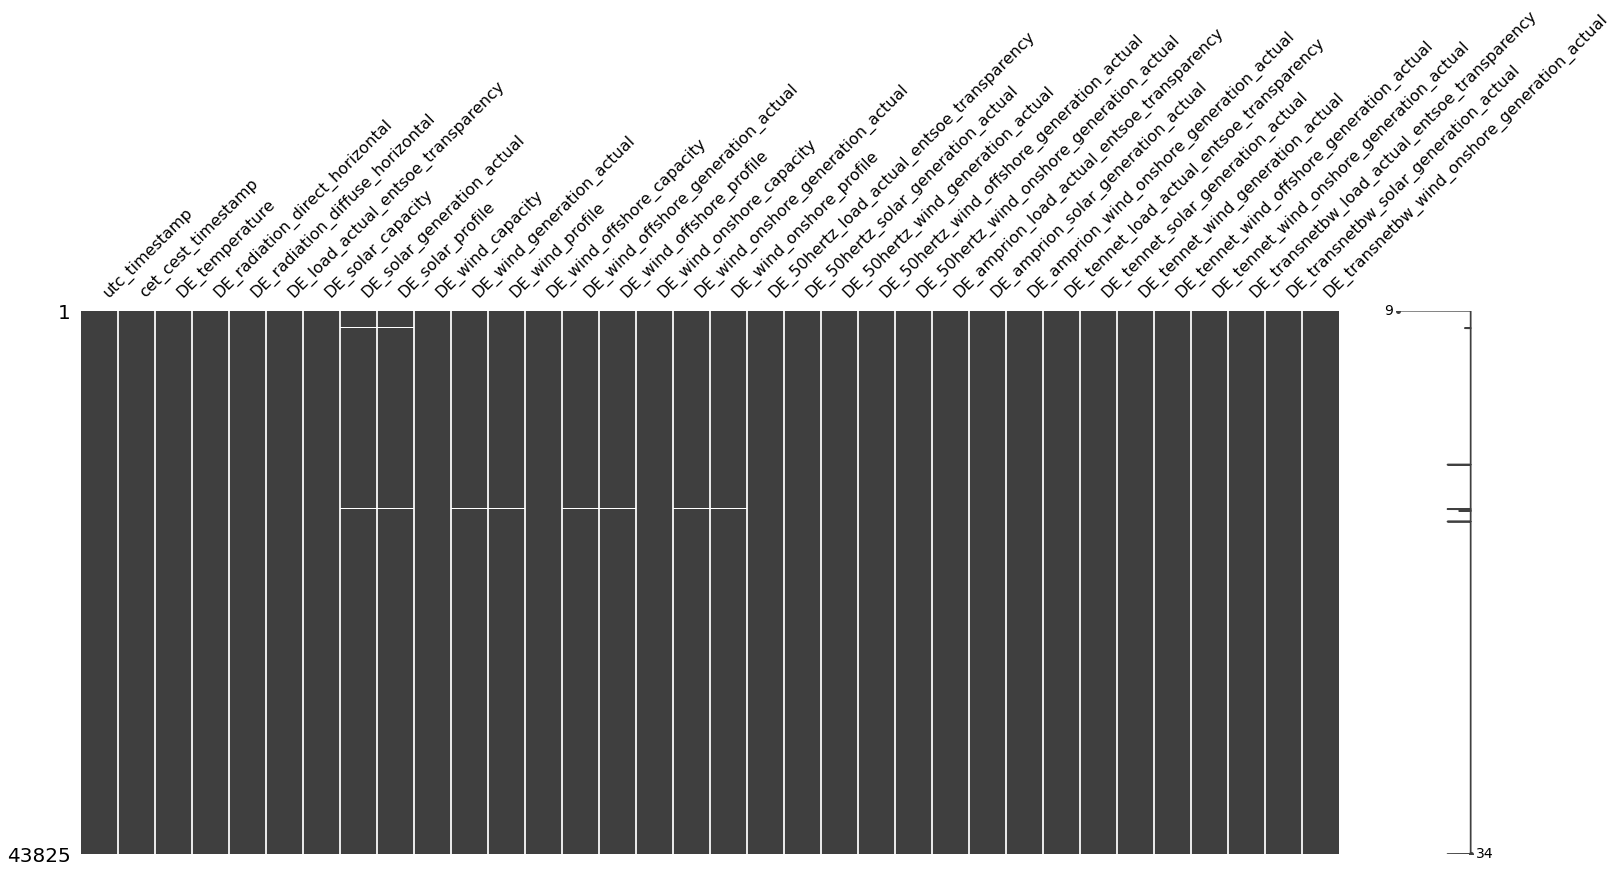

In [196]:
msno.matrix(ts_wt_DE)

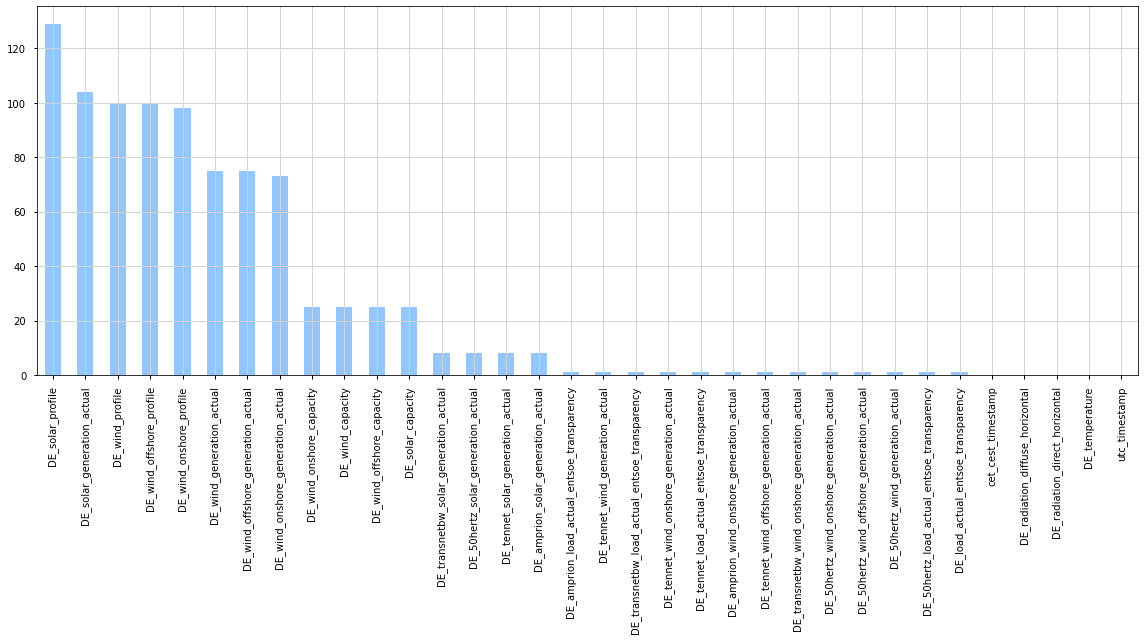

The number of rows having one or more nulls = 131 rows out of 43825 rows


In [197]:
sort_null_col = ts_wt_DE.isna().sum().sort_values(ascending = False)
sort_null_col.plot(kind = 'bar', figsize = (16,9))


plt.show()
print('The number of rows having one or more nulls = %s rows out of %s rows'\
      %(ts_wt_DE.isna().any(axis = 1).sum(), len(ts_wt_DE)))

In [198]:
ts_wt_DE.describe()

,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE_load_actual_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,...,DE_amprion_solar_generation_actual,DE_amprion_wind_onshore_generation_actual,DE_tennet_load_actual_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
count,43825.000000,43825.000000,43825.000000,43824.000000,43800.000000,43721.000000,43696.000000,43800.000000,43750.000000,43725.000000,...,43817.000000,43824.000000,43824.000000,43817.000000,43824.000000,43824.000000,43824.000000,43824.000000,43817.000000,43824.000000
mean,9.850472,82.748991,67.072165,55859.295044,42378.015114,4304.566318,0.101902,39972.606758,11157.555246,0.278908,...,998.543670,1772.858091,17352.092301,1597.470069,5522.850767,1615.273503,3907.576100,7020.890631,608.913139,231.643232
std,8.130307,158.997996,89.173543,10005.619850,4306.391773,6603.857970,0.155718,7262.785787,8694.138488,0.211566,...,1546.708047,1727.707418,3225.317976,2479.432498,4180.175337,1308.519701,3175.013254,1545.703965,954.399754,272.041884
min,-12.686000,0.000000,0.000000,31307.000000,37248.000000,0.000000,0.000000,27913.000000,135.000000,0.003800,...,0.000000,0.000000,10264.000000,0.000000,20.000000,0.000000,0.000000,3516.000000,0.000000,0.000000
25%,3.261000,0.000000,0.000000,47432.000000,38810.000000,0.000000,0.000000,33737.000000,4422.250000,0.114900,...,0.000000,504.000000,14621.000000,0.000000,2055.000000,441.000000,1412.000000,5696.000000,0.000000,40.000000
50%,9.237000,0.422000,6.321500,55467.000000,40941.000000,126.000000,0.003000,39808.000000,8728.000000,0.221100,...,27.000000,1170.000000,17193.000000,41.000000,4530.000000,1346.000000,3032.500000,6890.000000,12.000000,126.000000
75%,16.027000,79.193800,119.513900,64788.250000,46092.000000,6822.000000,0.162300,47730.000000,15584.000000,0.389300,...,1560.000000,2482.000000,20131.000000,2489.000000,8191.250000,2557.000000,5581.000000,8429.000000,927.000000,319.000000
max,35.479000,841.681000,392.089500,77549.000000,50508.000000,30028.000000,0.687300,50452.000000,45085.000000,1.078000,...,6981.000000,9148.000000,24577.000000,11755.000000,19727.000000,6080.000000,15874.000000,11733.000000,4092.000000,1453.000000


In [13]:
sort_null_col

DE_solar_profile                                 129
DE_solar_generation_actual                       104
DE_wind_profile                                  100
DE_wind_offshore_profile                         100
DE_wind_onshore_profile                           98
DE_wind_generation_actual                         75
DE_wind_offshore_generation_actual                75
DE_wind_onshore_generation_actual                 73
DE_wind_onshore_capacity                          25
DE_wind_capacity                                  25
DE_wind_offshore_capacity                         25
DE_solar_capacity                                 25
DE_transnetbw_solar_generation_actual              8
DE_50hertz_solar_generation_actual                 8
DE_tennet_solar_generation_actual                  8
DE_amprion_solar_generation_actual                 8
DE_amprion_load_actual_entsoe_transparency         1
DE_tennet_wind_generation_actual                   1
DE_transnetbw_load_actual_entsoe_transparency 

### duplicates

In [14]:
ts_wt_DE.duplicated# generate count statistics of duplicate entries
if len(ts_wt_DE[ts_wt_DE.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(ts_wt_DE[ts_wt_DE.duplicated()]))
    print(ts_wt_DE[ts_wt_DE.duplicated(keep=False)].sort_values(by=list(ts_wt_DE.columns)).head())
else: 
    print("No duplicated entries found")

No duplicated entries found


## correlation matrix

<AxesSubplot:>

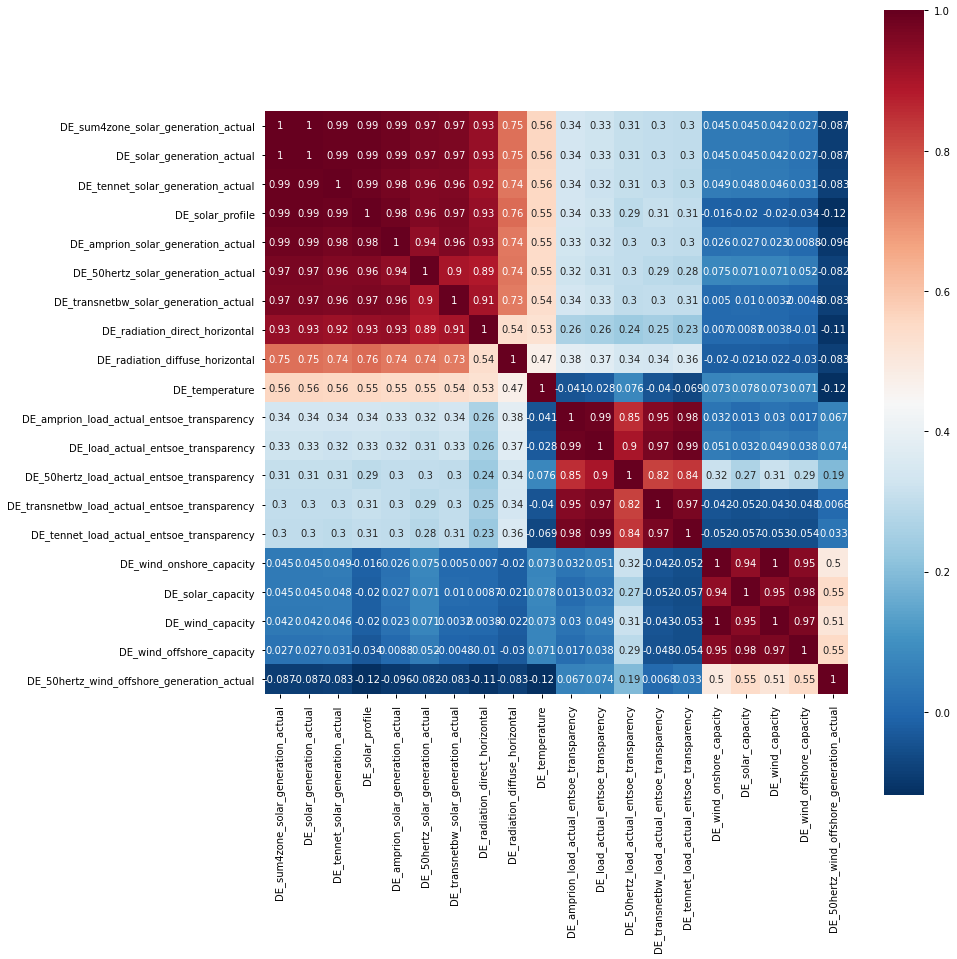

In [76]:
cols = ts_wt_DE_try.corr().nlargest(20, 'DE_sum4zone_solar_generation_actual')['DE_sum4zone_solar_generation_actual'].index
f, ax = plt.subplots(figsize = (14,14))
sns.heatmap(ts_wt_DE_try[cols].corr(), cmap='RdBu_r', square = True, annot=True)

## check homoscedascity

### targets

In [219]:
ts_wt_DE_try = ts_wt_DE.dropna()

In [220]:
targets = [
    'DE_load_actual_entsoe_transparency',
    'DE_solar_capacity',
    'DE_solar_generation_actual',
    'DE_solar_profile'
]

DE_load_actual_entsoe_transparency
Before >  Mean: 55860.220717, SD: 10006.314897


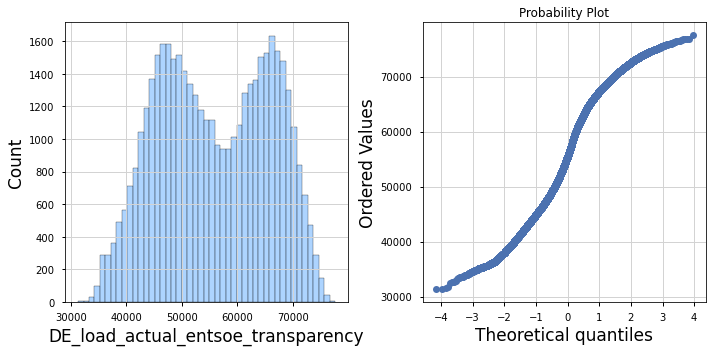

DE_solar_capacity
Before >  Mean: 42386.738912, SD: 4307.660947


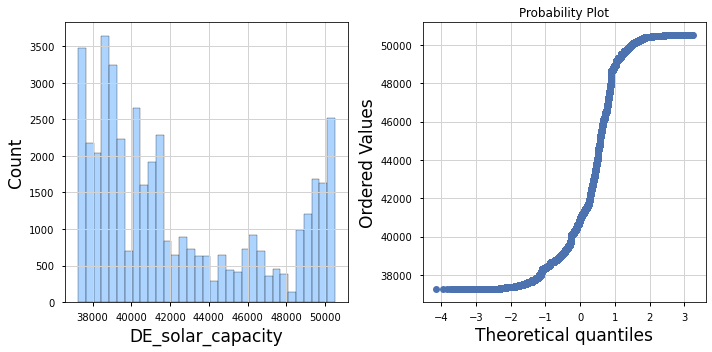

DE_solar_generation_actual
Before >  Mean: 4306.327551, SD: 6605.138255


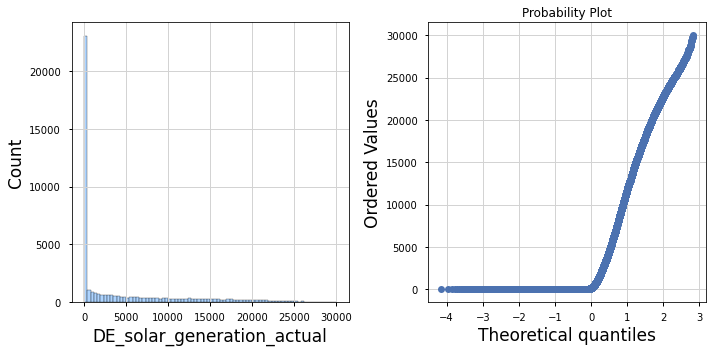

DE_solar_profile
Before >  Mean: 0.101905, SD: 0.155719


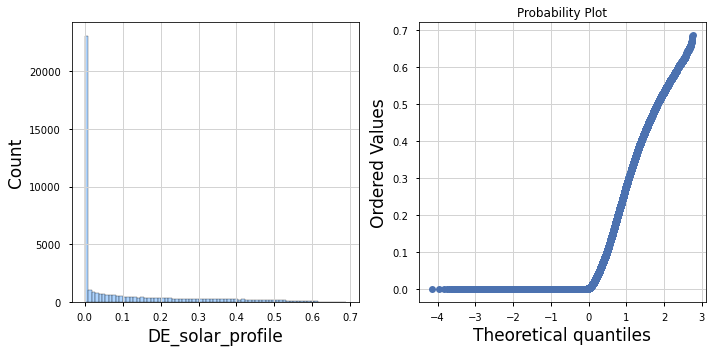

In [221]:
from scipy import stats
from scipy.stats import norm, skew
for target in targets:
    print(target)
    fig, ax= plt.subplots(1,2, figsize = (10,5))
    print("Before >  Mean: %f, SD: %f" %norm.fit(ts_wt_DE_try[target]))
    sns.histplot(ts_wt_DE[target], ax = ax[0])
    stats.probplot(ts_wt_DE[target], plot=ax[1])
    plt.show()

### features

In [222]:
skews = []
for col in ts_wt_DE_try.columns:
    if type(ts_wt_DE_try[col].values[0]) != str:
        skews.append((col, skew(ts_wt_DE_try[col])))   #func เช็คความเบ้ของ stat
skews.sort(key=lambda x : -abs(x[1]))

skews

[('DE_radiation_direct_horizontal', 2.2237939641428226),
 ('DE_transnetbw_wind_onshore_generation_actual', 1.7893417105852896),
 ('DE_50hertz_solar_generation_actual', 1.6609921113958817),
 ('DE_transnetbw_solar_generation_actual', 1.5975548729386455),
 ('DE_tennet_solar_generation_actual', 1.592749403308814),
 ('DE_amprion_solar_generation_actual', 1.5901157523819887),
 ('DE_solar_generation_actual', 1.555320511178618),
 ('DE_50hertz_wind_offshore_generation_actual', 1.5493695325241832),
 ('DE_solar_profile', 1.5300998498025202),
 ('DE_amprion_wind_onshore_generation_actual', 1.4692177008693192),
 ('DE_wind_onshore_generation_actual', 1.2733801853613824),
 ('DE_radiation_diffuse_horizontal', 1.2598435370648737),
 ('DE_wind_onshore_profile', 1.2399325950057971),
 ('DE_50hertz_wind_onshore_generation_actual', 1.2354748569065181),
 ('DE_50hertz_wind_generation_actual', 1.2205885693769798),
 ('DE_wind_generation_actual', 1.1325219582563255),
 ('DE_tennet_wind_onshore_generation_actual', 1

In [223]:
#จัดการเฉพาะตัวที่ corr ต่อ 'DE_solar_generation_actual' สูงๆ
cols = ts_wt_DE_try.corr().nlargest(15, 'DE_solar_generation_actual')['DE_solar_generation_actual'].index

tmp = []
for i in skews:
    if abs(i[1]) > 0 and i[0] in cols:
        tmp.append(i)
tmp

[('DE_radiation_direct_horizontal', 2.2237939641428226),
 ('DE_50hertz_solar_generation_actual', 1.6609921113958817),
 ('DE_transnetbw_solar_generation_actual', 1.5975548729386455),
 ('DE_tennet_solar_generation_actual', 1.592749403308814),
 ('DE_amprion_solar_generation_actual', 1.5901157523819887),
 ('DE_solar_generation_actual', 1.555320511178618),
 ('DE_solar_profile', 1.5300998498025202),
 ('DE_radiation_diffuse_horizontal', 1.2598435370648737),
 ('DE_temperature', 0.23829175094861219),
 ('DE_50hertz_load_actual_entsoe_transparency', -0.2010311403038277),
 ('DE_wind_onshore_capacity', -0.09006430997262636),
 ('DE_transnetbw_load_actual_entsoe_transparency', 0.0531744889943658),
 ('DE_load_actual_entsoe_transparency', -0.033195629980402444),
 ('DE_amprion_load_actual_entsoe_transparency', -0.0241327977250079),
 ('DE_tennet_load_actual_entsoe_transparency', 0.01576057908631397)]

('DE_radiation_direct_horizontal', 2.2237939641428226)
Before >  Mean: 82.934314, SD: 159.173268


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


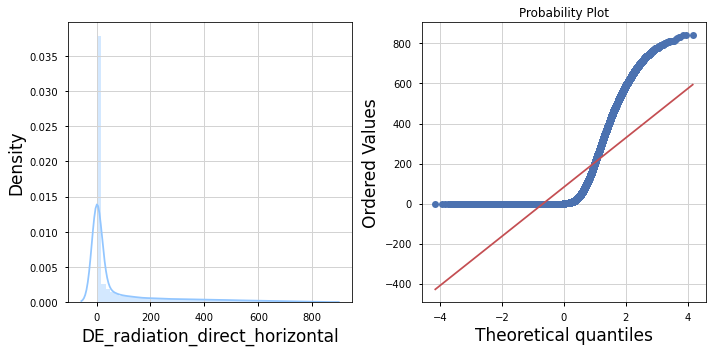

('DE_50hertz_solar_generation_actual', 1.6609921113958817)
Before >  Mean: 1097.572458, SD: 1733.290065


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


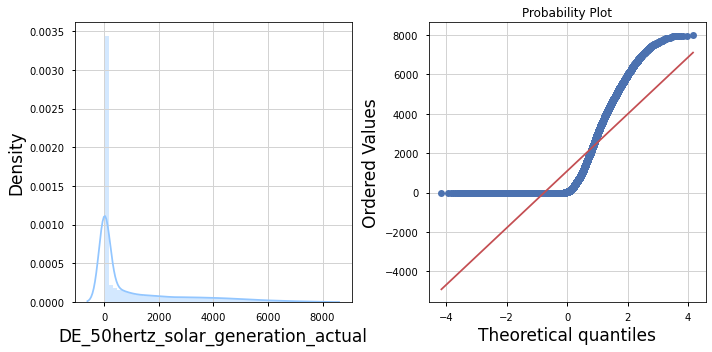

('DE_transnetbw_solar_generation_actual', 1.5975548729386455)
Before >  Mean: 609.373552, SD: 955.014278


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


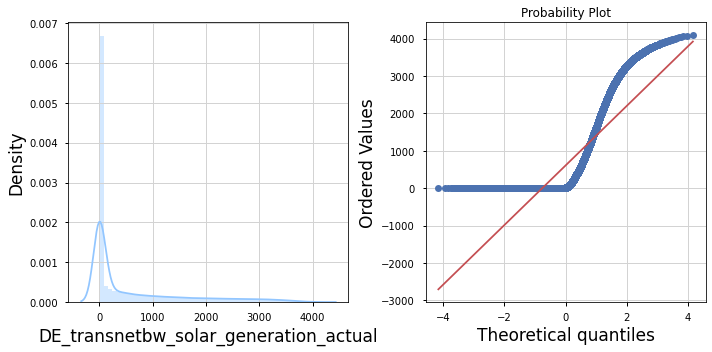

('DE_tennet_solar_generation_actual', 1.592749403308814)
Before >  Mean: 1599.717078, SD: 2481.695429


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


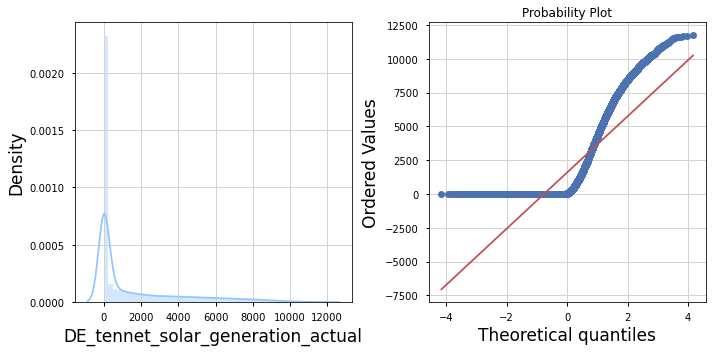

('DE_amprion_solar_generation_actual', 1.5901157523819887)
Before >  Mean: 999.782213, SD: 1547.925330


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


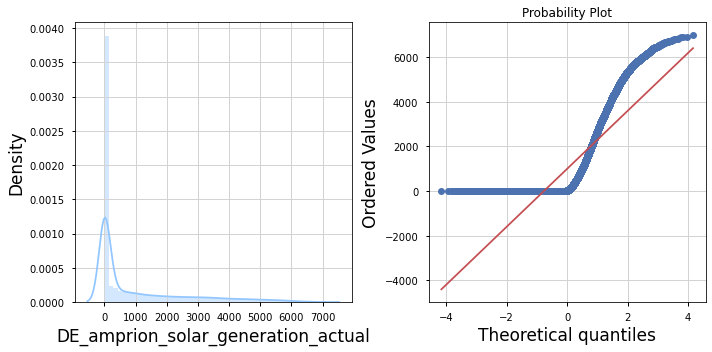

('DE_solar_generation_actual', 1.555320511178618)
Before >  Mean: 4306.327551, SD: 6605.138255


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


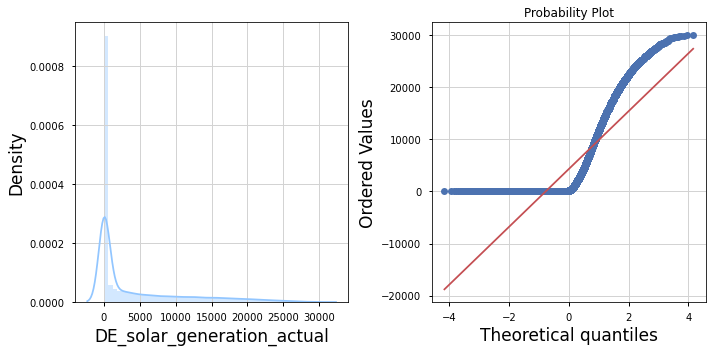

('DE_solar_profile', 1.5300998498025202)
Before >  Mean: 0.101905, SD: 0.155719


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


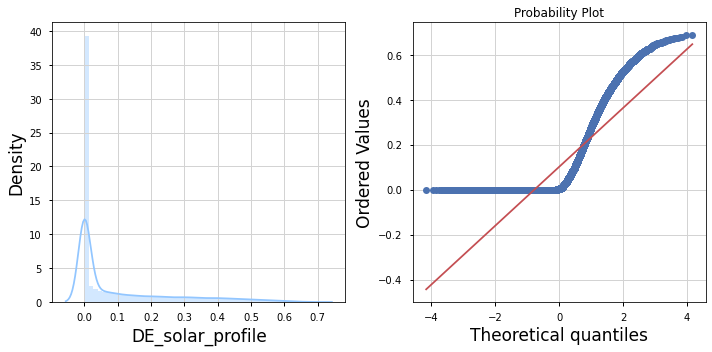

('DE_radiation_diffuse_horizontal', 1.2598435370648737)
Before >  Mean: 67.110716, SD: 89.164676


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


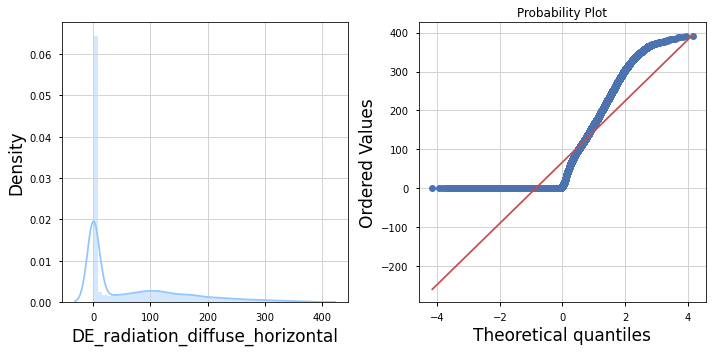

('DE_temperature', 0.23829175094861219)
Before >  Mean: 9.862320, SD: 8.132464


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


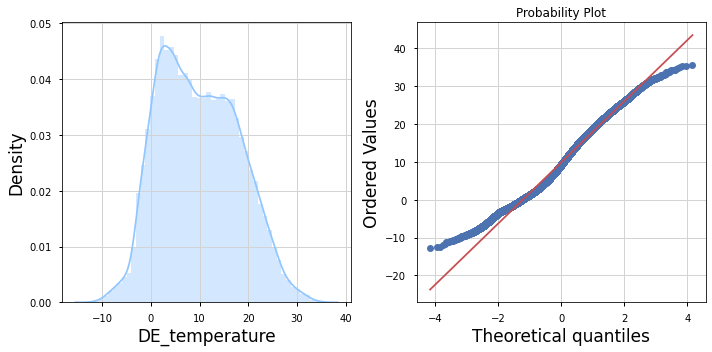

('DE_50hertz_load_actual_entsoe_transparency', -0.2010311403038277)
Before >  Mean: 10370.765025, SD: 1977.761372


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


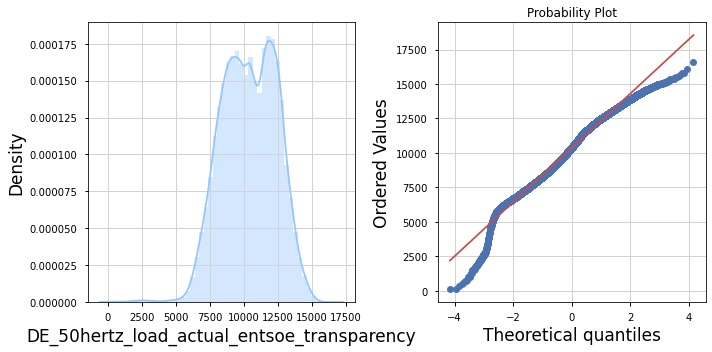

('DE_wind_onshore_capacity', -0.09006430997262636)
Before >  Mean: 36724.367877, SD: 5961.474985


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


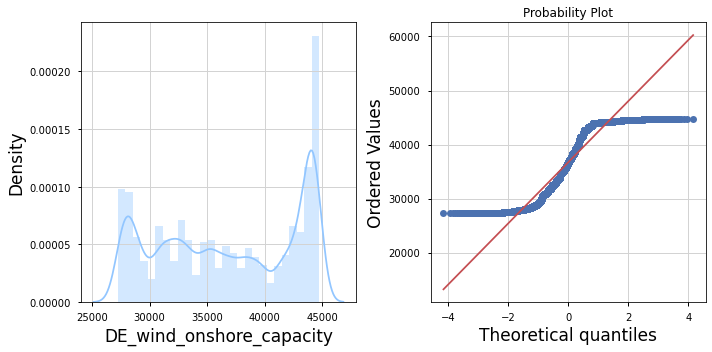

('DE_transnetbw_load_actual_entsoe_transparency', 0.0531744889943658)
Before >  Mean: 7020.745846, SD: 1545.691724


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


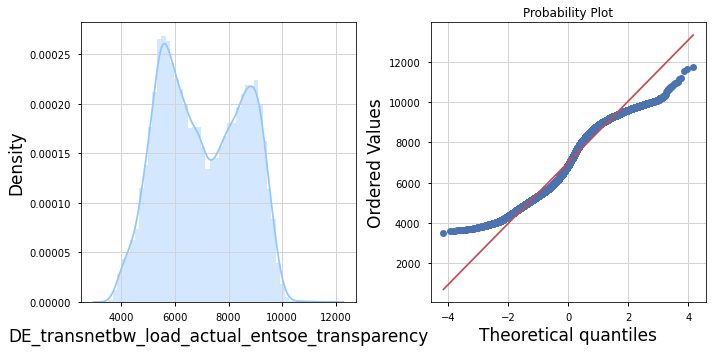

('DE_load_actual_entsoe_transparency', -0.033195629980402444)
Before >  Mean: 55860.220717, SD: 10006.314897


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


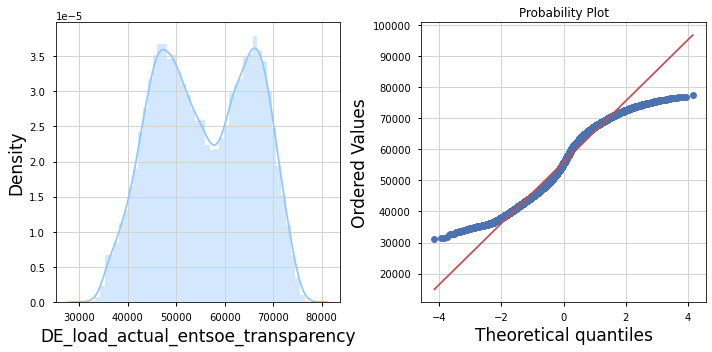

('DE_amprion_load_actual_entsoe_transparency', -0.0241327977250079)
Before >  Mean: 21117.198998, SD: 3579.253470


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


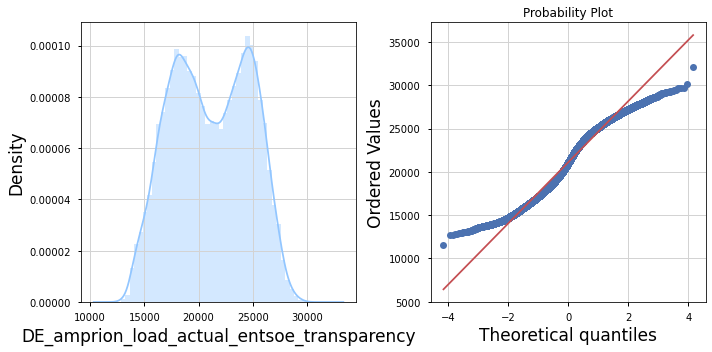

('DE_tennet_load_actual_entsoe_transparency', 0.01576057908631397)
Before >  Mean: 17351.753605, SD: 3225.231919


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


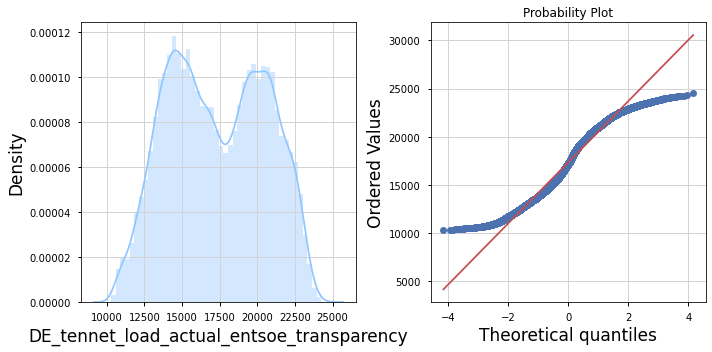

In [224]:
from scipy import stats
from scipy.stats import norm, skew
for i in tmp:
    print(i)
    fig, ax= plt.subplots(1,2, figsize = (10,5))
    print("Before >  Mean: %f, SD: %f" %norm.fit(ts_wt_DE_try[i[0]]))
    sns.distplot(ts_wt_DE_try[i[0]], ax = ax[0])
    stats.probplot(ts_wt_DE_try[i[0]], plot=ax[1])
    plt.show()

##### ต้องบอกให้ได้ว่าถ้ามันเป็นแบบนี้แล้วต้องใช้วิธีอะไรในการทำต่อ

In [225]:
ts_wt_DE_try.corr().nlargest(15, 'DE_solar_generation_actual')['DE_solar_generation_actual'].index

Index(['DE_solar_generation_actual', 'DE_tennet_solar_generation_actual', 'DE_solar_profile', 'DE_amprion_solar_generation_actual', 'DE_50hertz_solar_generation_actual', 'DE_transnetbw_solar_generation_actual', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal', 'DE_temperature', 'DE_amprion_load_actual_entsoe_transparency', 'DE_load_actual_entsoe_transparency', 'DE_50hertz_load_actual_entsoe_transparency', 'DE_transnetbw_load_actual_entsoe_transparency', 'DE_tennet_load_actual_entsoe_transparency', 'DE_wind_onshore_capacity'], dtype='object')

In [226]:
ts_wt_DE_try['DE_sum4zone_solar_generation_actual'] = \
ts_wt_DE_try['DE_tennet_solar_generation_actual'] + \
ts_wt_DE_try['DE_amprion_solar_generation_actual'] + \
ts_wt_DE_try['DE_50hertz_solar_generation_actual'] + \
ts_wt_DE_try['DE_transnetbw_solar_generation_actual']

ts_wt_DE_try.reset_index(inplace = True, drop = True)


/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


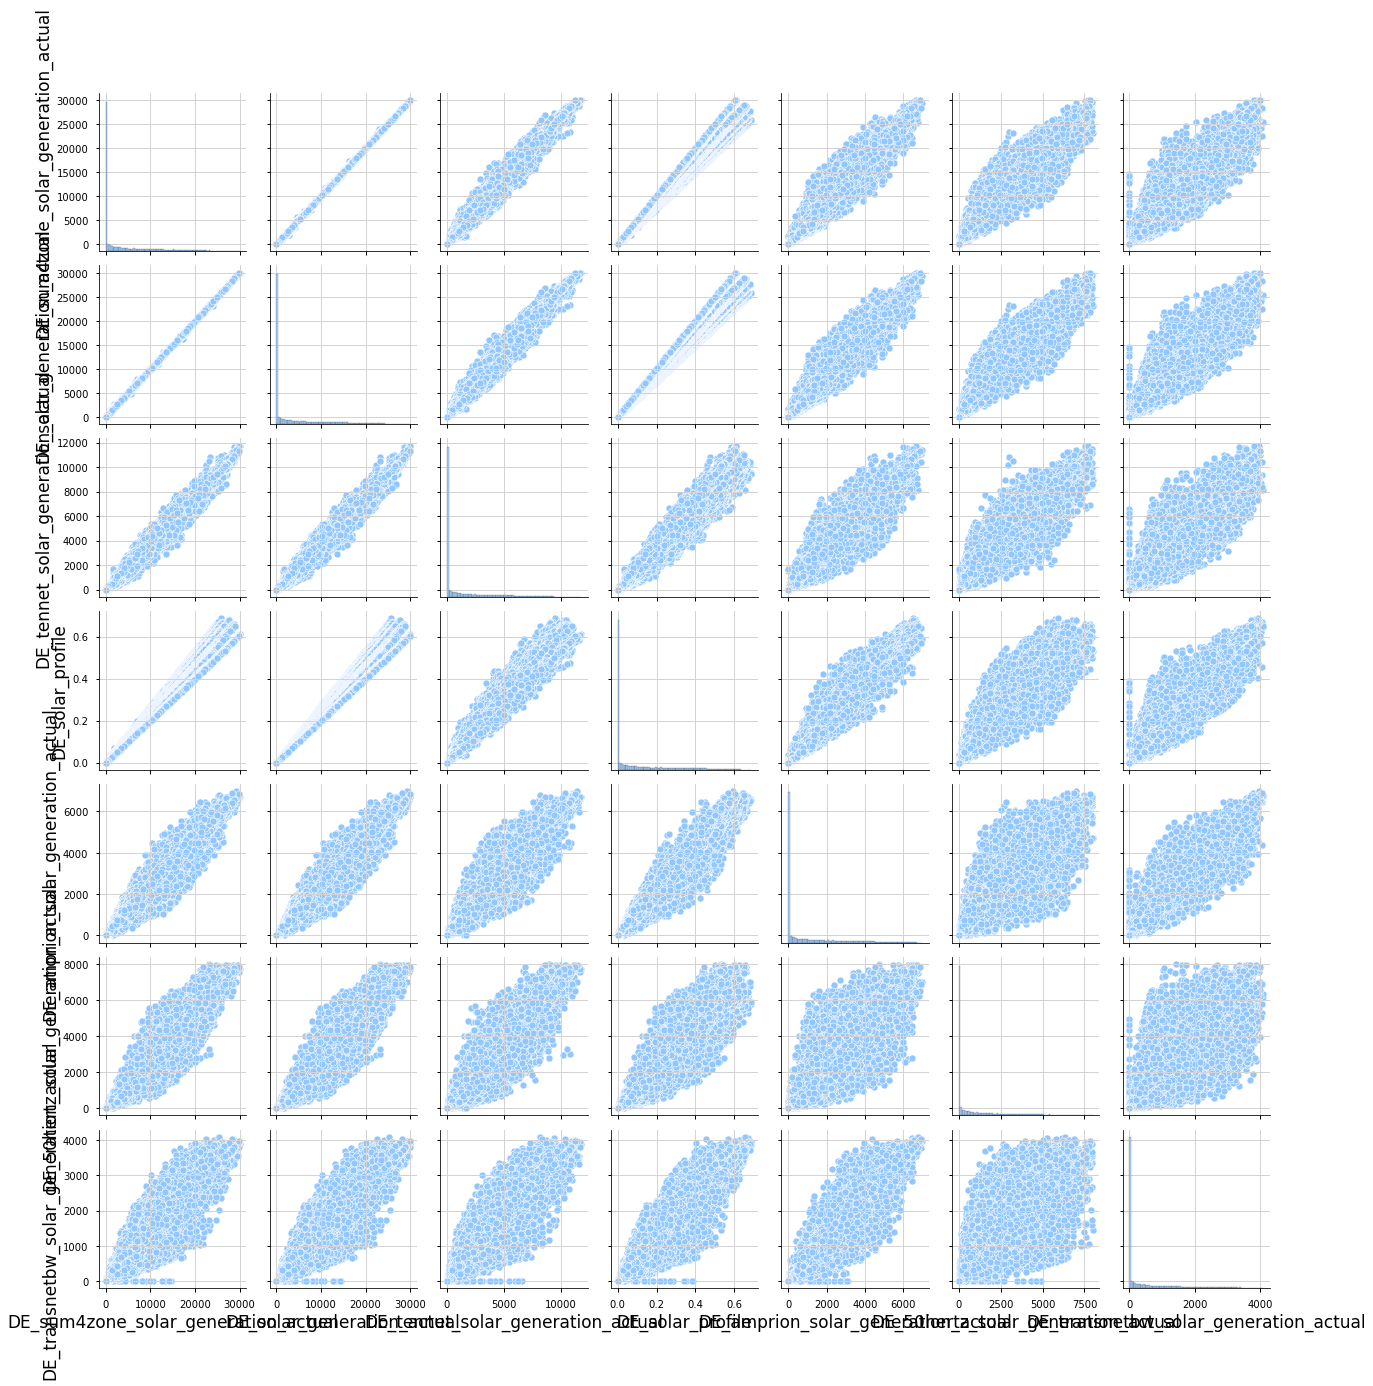

In [227]:
cols = ts_wt_DE_try.corr().nlargest(7, 'DE_sum4zone_solar_generation_actual')['DE_sum4zone_solar_generation_actual'].index
sns.pairplot(ts_wt_DE_try[cols])
plt.show()

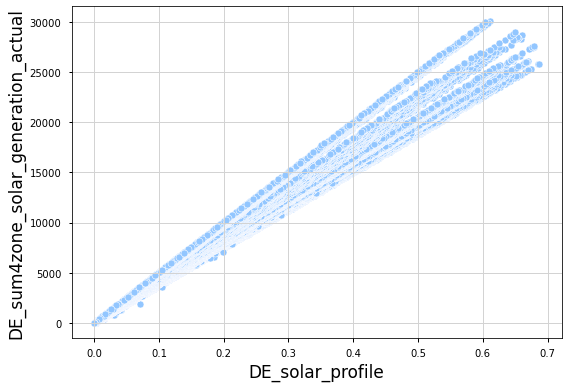

In [228]:
sns.scatterplot(data=ts_wt_DE_try, x='DE_solar_profile', y='DE_sum4zone_solar_generation_actual')         
plt.show()

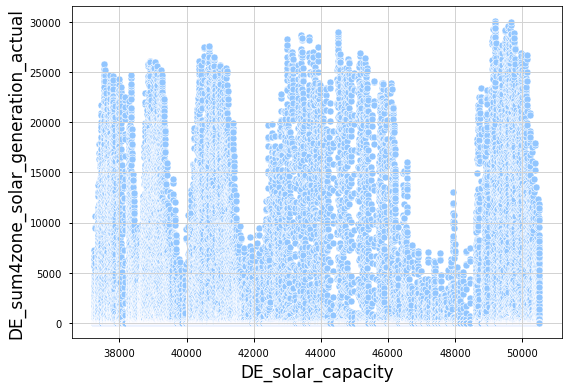

In [265]:
sns.scatterplot(data=ts_wt_DE_try, x='DE_solar_capacity', y='DE_sum4zone_solar_generation_actual')         
plt.show()

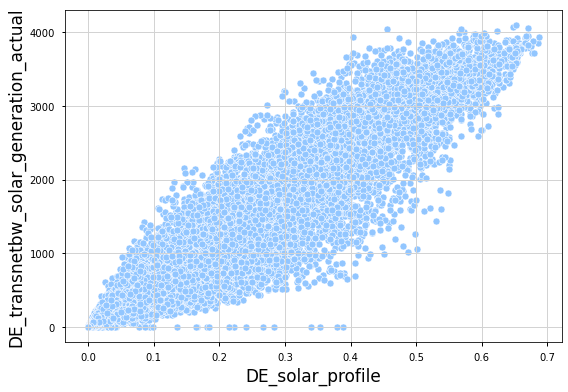

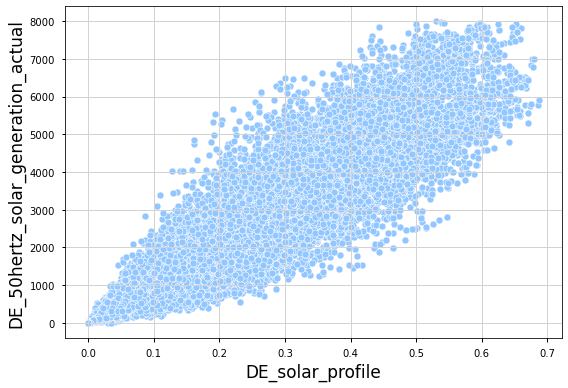

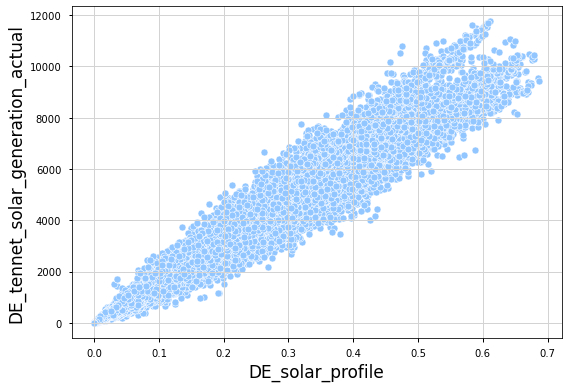

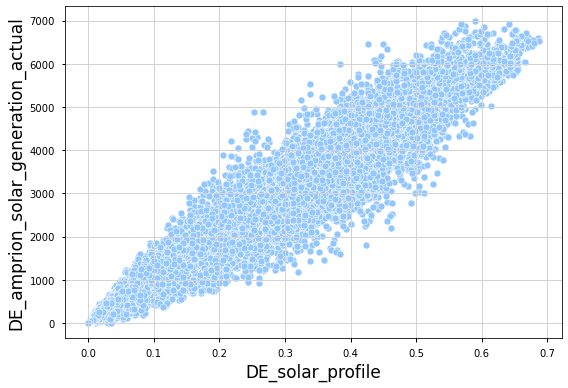

In [229]:
gen_list = [
    'DE_transnetbw_solar_generation_actual',
    'DE_50hertz_solar_generation_actual', 
    'DE_tennet_solar_generation_actual', 
    'DE_amprion_solar_generation_actual'
]

for i in gen_list:
    sns.scatterplot(data=ts_wt_DE_try, x='DE_solar_profile', y= i)         
    plt.show()

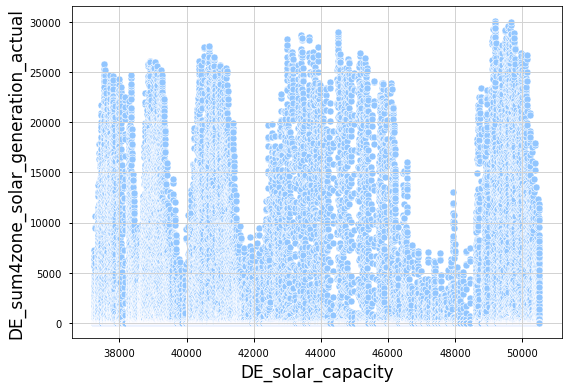

In [230]:
sns.scatterplot(data=ts_wt_DE_try, x='DE_solar_capacity', y='DE_sum4zone_solar_generation_actual')         
plt.show()

In [231]:
for i in ts_wt_DE_try.columns:
    print(i)

utc_timestamp
cet_cest_timestamp
DE_temperature
DE_radiation_direct_horizontal
DE_radiation_diffuse_horizontal
DE_load_actual_entsoe_transparency
DE_solar_capacity
DE_solar_generation_actual
DE_solar_profile
DE_wind_capacity
DE_wind_generation_actual
DE_wind_profile
DE_wind_offshore_capacity
DE_wind_offshore_generation_actual
DE_wind_offshore_profile
DE_wind_onshore_capacity
DE_wind_onshore_generation_actual
DE_wind_onshore_profile
DE_50hertz_load_actual_entsoe_transparency
DE_50hertz_solar_generation_actual
DE_50hertz_wind_generation_actual
DE_50hertz_wind_offshore_generation_actual
DE_50hertz_wind_onshore_generation_actual
DE_amprion_load_actual_entsoe_transparency
DE_amprion_solar_generation_actual
DE_amprion_wind_onshore_generation_actual
DE_tennet_load_actual_entsoe_transparency
DE_tennet_solar_generation_actual
DE_tennet_wind_generation_actual
DE_tennet_wind_offshore_generation_actual
DE_tennet_wind_onshore_generation_actual
DE_transnetbw_load_actual_entsoe_transparency
DE_transn

##### Features that need to be excluded
- ?load
- ?solar profile (explanation: Share of installed capacity producing)
- solar capacity (Aggregated installed capacity of power plants (actual availability not accounted for))
- De_solar_generation_actual -> DE_sum4zone_solar_geeneration_actual (สร้างเอง)
- load ตัดออก
- ?คิดว่าถึงจะมีโอกาสเกี่ยวก็จะต้องตัดออก เพราะมันไม่ใช่ raw data ของ wind

In [232]:
temp = []
for i in ts_wt_DE_try.columns:
    if ('wind' not in i.lower()) and\
    ('load' not in i.lower()) and\
    ('profile' not in i.lower()) and\
    ('capacity' not in i.lower()):
        temp.append(i)
temp.remove('DE_solar_generation_actual')
temp

['utc_timestamp',
 'cet_cest_timestamp',
 'DE_temperature',
 'DE_radiation_direct_horizontal',
 'DE_radiation_diffuse_horizontal',
 'DE_50hertz_solar_generation_actual',
 'DE_amprion_solar_generation_actual',
 'DE_tennet_solar_generation_actual',
 'DE_transnetbw_solar_generation_actual',
 'DE_sum4zone_solar_generation_actual']

In [233]:
ts_wt_DE_try[temp]

,utc_timestamp,cet_cest_timestamp,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE_50hertz_solar_generation_actual,DE_amprion_solar_generation_actual,DE_tennet_solar_generation_actual,DE_transnetbw_solar_generation_actual,DE_sum4zone_solar_generation_actual
0,2015-01-01T07:00:00Z,2015-01-01T08:00:00+0100,-1.692,0.4328,6.7680,52.0,14.0,15.0,8.0,89.0
1,2015-01-01T08:00:00Z,2015-01-01T09:00:00+0100,-1.046,8.8773,51.9464,267.0,272.0,175.0,60.0,774.0
2,2015-01-01T09:00:00Z,2015-01-01T10:00:00+0100,0.072,34.1583,97.0929,804.0,773.0,426.0,113.0,2116.0
3,2015-01-01T10:00:00Z,2015-01-01T11:00:00+0100,0.866,56.5458,120.2907,1512.0,1057.0,658.0,137.0,3364.0
4,2015-01-01T11:00:00Z,2015-01-01T12:00:00+0100,1.493,62.8690,126.2112,1892.0,1379.0,762.0,166.0,4199.0
...,...,...,...,...,...,...,...,...,...,...
43689,2019-12-30T18:00:00Z,2019-12-30T19:00:00+0100,0.225,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
43690,2019-12-30T19:00:00Z,2019-12-30T20:00:00+0100,0.025,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
43691,2019-12-30T20:00:00Z,2019-12-30T21:00:00+0100,-0.148,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
43692,2019-12-30T21:00:00Z,2019-12-30T22:00:00+0100,-0.243,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0


# Weather

In [234]:
ts_wt_DE_try[['DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal']].corr()

,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
DE_temperature,1.000000,0.528209,0.473472
DE_radiation_direct_horizontal,0.528209,1.000000,0.537800
DE_radiation_diffuse_horizontal,0.473472,0.537800,1.000000


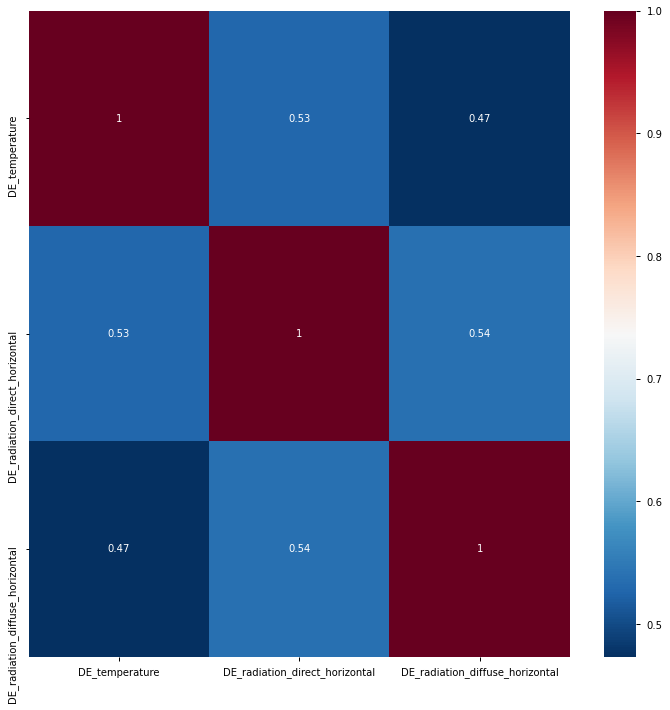

In [235]:
plt.subplots(figsize=(10, 10))
sns.heatmap(ts_wt_DE_try[['DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal']].corr(), xticklabels=ts_wt_DE[['DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal']].columns, yticklabels=ts_wt_DE[['DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal']].columns, cmap='RdBu_r', annot=True)
plt.show()

In [236]:
#change format utc_datetime to datetime
ts_wt_DE_try['utc_timestamp'] = \
ts_wt_DE_try['utc_timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Columns plots

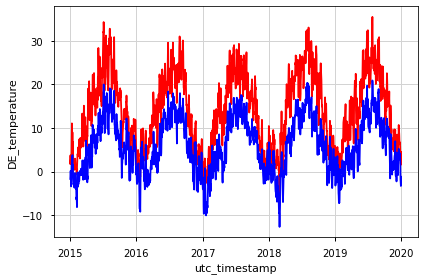

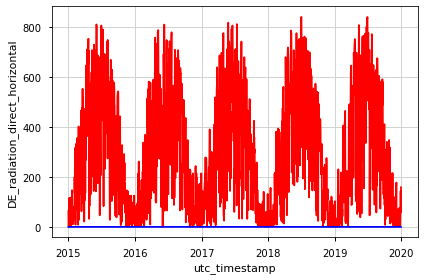

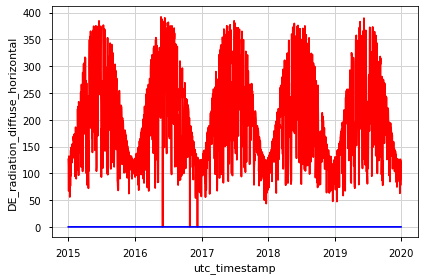

In [120]:
for i in ts_wt_DE[['DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal']].columns:
    ts_wt_DE_try.groupby(
        ts_wt_DE_try['utc_timestamp'].dt.date
    ).agg(
        'max'
    )[i]\
    .plot(
        ylabel = i, c = 'red'
    )
    
    
    
    ts_wt_DE_try.groupby(
        ts_wt_DE_try['utc_timestamp'].dt.date
    ).agg(
        'min'
    )[i]\
    .plot(
        ylabel = i, c = 'blue'
    )
    plt.show()

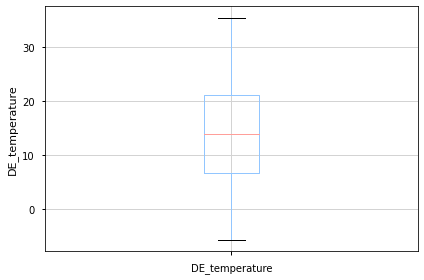

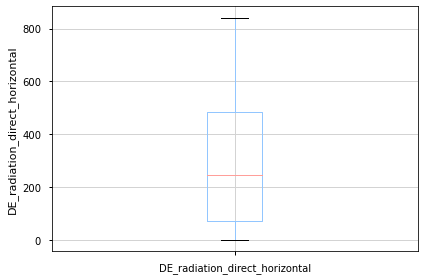

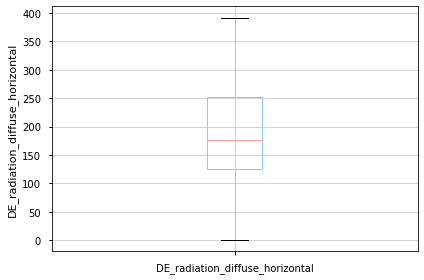

In [116]:
for i in ts_wt_DE[['DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal']].columns:
    temp = ts_wt_DE_try.groupby(
        ts_wt_DE_try['utc_timestamp'].dt.date
    ).agg(
        'max'
    )
    
    temp[i]\
    .plot(
        ylabel = i,
        kind = 'box'
    )
    
    plt.show()

# Plot of Radiation in 1 day

## create season column from utc time

In [238]:
def month_to_season(m):
    if m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    elif m in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

In [239]:
ts_wt_DE_try['season'] = ts_wt_DE_try['utc_timestamp'].dt.month\
.apply(lambda x: month_to_season(x))

/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


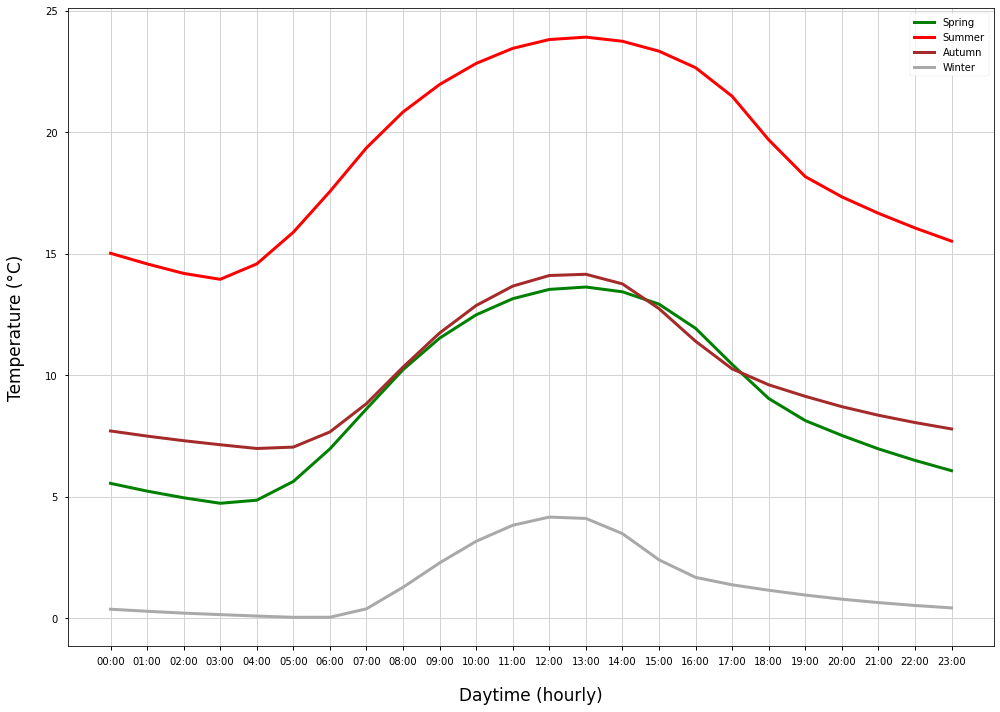

In [261]:
plt.figure(figsize = (14, 10))
ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Spring']\
.groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
['DE_temperature'].agg('mean').plot(
    xlabel = 'DE_temperature', 
    c ='green',
    linewidth = 3
)

ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Summer']\
.groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
['DE_temperature'].agg('mean').plot(
    xlabel = 'DE_temperature', 
    c ='red',
    linewidth = 3
)

ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Autumn']\
.groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
['DE_temperature'].agg('mean').plot(
    xlabel = 'DE_temperature', 
    c ='brown',
    linewidth = 3
)

ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Winter']\
.groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
['DE_temperature'].agg('mean').plot(
    xlabel = 'DE_temperature', 
    c ='darkgrey',
    linewidth = 3
)

plt.legend(['Spring', 'Summer', 'Autumn', 'Winter'])
plt.xticks(ts_wt_DE_try['utc_timestamp'].dt.time.unique())

plt.xlabel('Daytime (hourly)', labelpad = 20)
plt.ylabel('Temperature (°C)', labelpad = 20)
plt.show()

In [283]:
plt.legend?

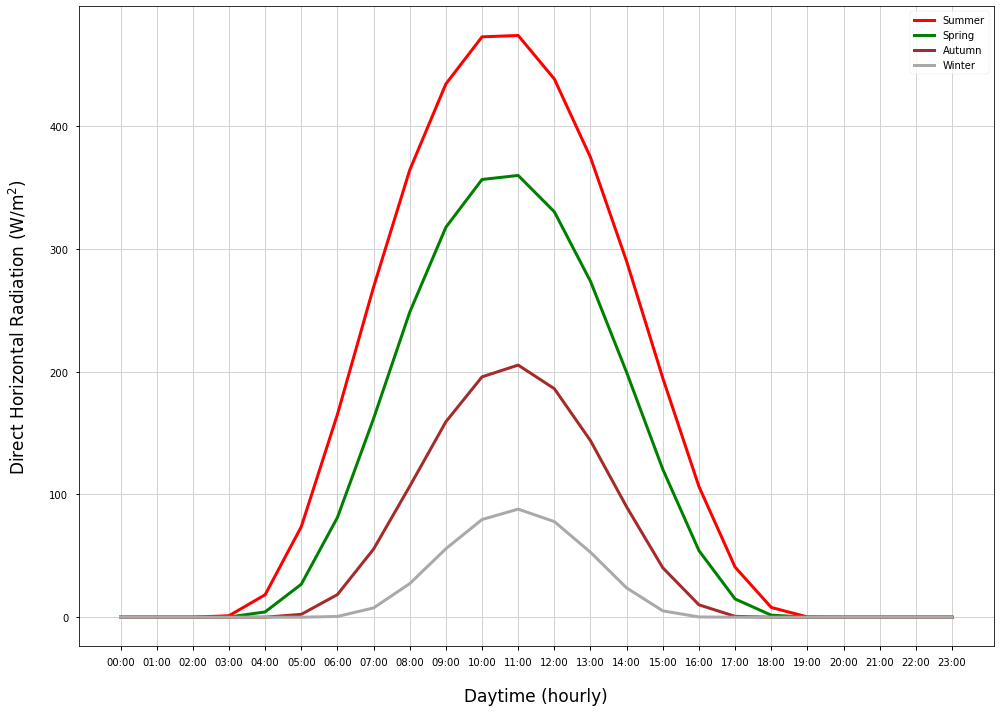

In [300]:
plt.figure(figsize = (14, 10))


ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Summer']\
.groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
['DE_radiation_direct_horizontal'].agg('mean').plot(
    xlabel = 'DE_radiation_direct_horizontal', 
    c ='red',
    linewidth = 3,
    label = 'Summer'
)
# ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Summer']\
# .groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
# ['DE_radiation_direct_horizontal'].agg('max').plot(
#     xlabel = 'DE_radiation_direct_horizontal', 
#     c ='red',
#     linewidth = 3,
#     alpha = 0.2,
#     label='_nolegend_'
# )







ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Spring']\
.groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
['DE_radiation_direct_horizontal'].agg('mean').plot(
    xlabel = 'DE_radiation_direct_horizontal', 
    c ='green',
    linewidth = 3,
    label = 'Spring'
)
# ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Spring']\
# .groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
# ['DE_radiation_direct_horizontal'].agg('max').plot(
#     xlabel = 'DE_radiation_direct_horizontal', 
#     c ='green',
#     linewidth = 3,
#     alpha = 0.2,
#     label='_nolegend_'
# )










ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Autumn']\
.groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
['DE_radiation_direct_horizontal'].agg('mean').plot(
    xlabel = 'DE_radiation_direct_horizontal', 
    c ='brown',
    linewidth = 3,
    label = 'Autumn'
)
# ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Autumn']\
# .groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
# ['DE_radiation_direct_horizontal'].agg('max').plot(
#     xlabel = 'DE_radiation_direct_horizontal', 
#     c ='brown',
#     linewidth = 3,
#     alpha = 0.2,
#     label='_nolegend_'
# )




ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Winter']\
.groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
['DE_radiation_direct_horizontal'].agg('mean').plot(
    xlabel = 'DE_radiation_direct_horizontal', 
    c ='darkgrey',
    linewidth = 3,
    label = 'Winter'
)
# ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Winter']\
# .groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
# ['DE_radiation_direct_horizontal'].agg('max').plot(
#     xlabel = 'DE_radiation_direct_horizontal', 
#     c ='darkgrey',
#     linewidth = 3,
#     alpha = 0.2,
#     label = None
# )



plt.legend()
plt.xticks(ts_wt_DE_try['utc_timestamp'].dt.time.unique())

plt.xlabel('Daytime (hourly)', labelpad = 20)
plt.ylabel('Direct Horizontal Radiation (W/m$^2$)', labelpad = 20)
plt.show()

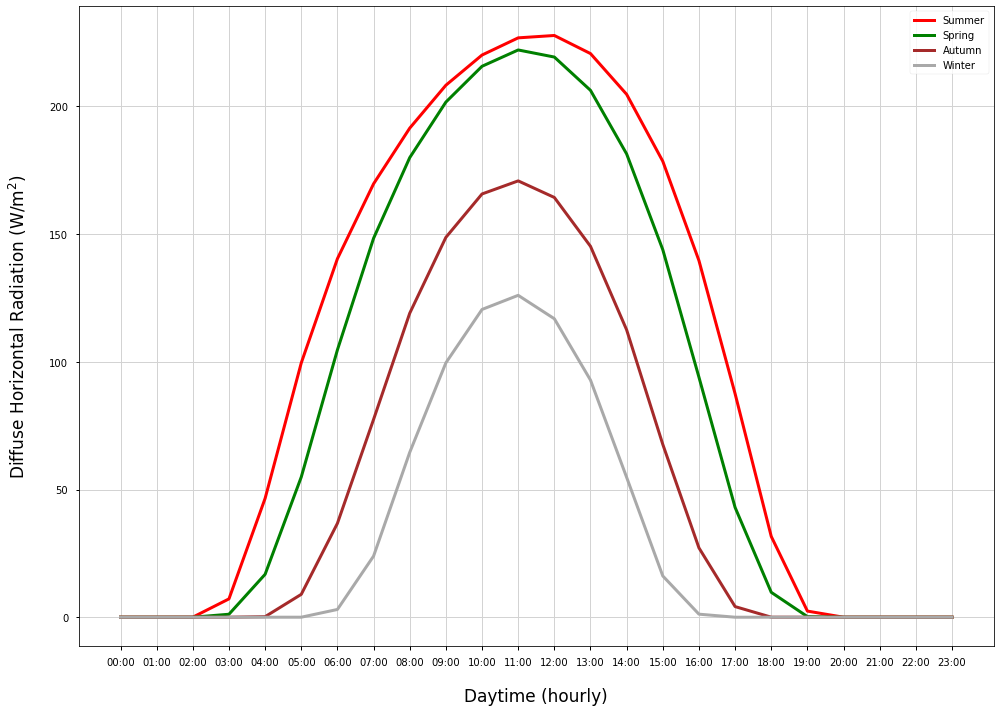

In [301]:
plt.figure(figsize = (14, 10))

ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Summer']\
.groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
['DE_radiation_diffuse_horizontal'].agg('mean').plot(
    xlabel = 'DE_radiation_diffuse_horizontal', 
    c ='red',
    linewidth = 3
)


ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Spring']\
.groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
['DE_radiation_diffuse_horizontal'].agg('mean').plot(
    xlabel = 'DE_radiation_diffuse_horizontal', 
    c ='green',
    linewidth = 3
)


ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Autumn']\
.groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
['DE_radiation_diffuse_horizontal'].agg('mean').plot(
    xlabel = 'DE_radiation_diffuse_horizontal', 
    c ='brown',
    linewidth = 3
)

ts_wt_DE_try.loc[ts_wt_DE_try['season'] == 'Winter']\
.groupby(ts_wt_DE_try['utc_timestamp'].dt.time)\
['DE_radiation_diffuse_horizontal'].agg('mean').plot(
    xlabel = 'DE_radiation_diffuse_horizontal', 
    c ='darkgrey',
    linewidth = 3
)

plt.legend(['Summer', 'Spring', 'Autumn', 'Winter'])
plt.xticks(ts_wt_DE_try['utc_timestamp'].dt.time.unique())

plt.xlabel('Daytime (hourly)', labelpad = 20)
plt.ylabel('Diffuse Horizontal Radiation (W/m$^2$)', labelpad = 20)
plt.show()